# Plot Incumbent Training Process against baseline

In [1]:
from plotting.plot_utils import get_logtable, set_rc_params
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
set_rc_params()

In [2]:
database_name = "fehring_growing_nn_new_seeded"

In [3]:
baseline_depth_1_callback_data = get_logtable(database_name=database_name, table_name="bb_net2deeper_baseline", logtable_name="smac_callbacks")
baseline_depth_1_training_process_data = get_logtable(database_name=database_name, table_name="bb_net2deeper_baseline", logtable_name="training_process")

baseline_depth_2_callback_data = get_logtable(database_name=database_name, table_name="incumbent_gen_2_layers", logtable_name="smac_callbacks")
baseline_depth_2_training_process_data = get_logtable(database_name=database_name, table_name="incumbent_gen_2_layers", logtable_name="training_process")

net2deeper_smac_callback_data = get_logtable(database_name=database_name, table_name="net2deeper", logtable_name="smac_callbacks")
net2deeper_training_process_data = get_logtable(database_name=database_name, table_name="net2deeper", logtable_name="training_process")

2024-08-08 09:38:29,149  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-08 09:38:29,150  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-08 09:38:29,150  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-08 09:38:29,150  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-08 09:38:29,150  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-08 09:38:29,150  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-08 09:38:29,150  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-08 09:38:29,151  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-08 09:38:29,151  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-08 09:38:29,151  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-08 09:38:29,224  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-08 09:38:29,373  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-08 09:38:29,461  | py-experimenter - INFO     | Opening tunnel: 127.0.0.1:3306 <> 127.0.0.1:3306
2024-08-08 09:38:29,565  | py-experimenter - INFO     | Initialized and connected to database
2024-08-08 09:38:29,802  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-08 09:38:29,802  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-08 09:38:29,803  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-08 09:38:29,803  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-08 09:38:29,804  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-08 09:38:29,804  | py-experimenter - WARNING  | No values given for keyfield observation_keys


In [4]:
baseline_depth_1_callback_data=baseline_depth_1_callback_data[baseline_depth_1_callback_data["experiment_id"] ==1]
baseline_depth_1_training_process_data=baseline_depth_1_training_process_data[baseline_depth_1_training_process_data["experiment_id"] ==1]

In [5]:
baseline_depth_2_callback_data=baseline_depth_2_callback_data[baseline_depth_2_callback_data["experiment_id"] ==1]
baseline_depth_2_training_process_data=baseline_depth_2_training_process_data[baseline_depth_2_training_process_data["experiment_id"] ==1]

In [6]:
net2deeper_depth_4_callback_data = net2deeper_smac_callback_data[net2deeper_smac_callback_data["experiment_id"] == 1]
net2deeper_depth_4_training_process_data = net2deeper_training_process_data[net2deeper_training_process_data["experiment_id"] == 1]

net2deeper_depth_2_callback_data = net2deeper_smac_callback_data[net2deeper_smac_callback_data["experiment_id"] == 2]
net2deeper_depth_2_training_process_data = net2deeper_training_process_data[net2deeper_training_process_data["experiment_id"] == 2]

In [7]:
baseline_depth1_smac_incumbent = baseline_depth_1_callback_data.iloc[baseline_depth_1_callback_data["cost"].idxmin()]
baseline_depth1_incumbent_trial_number = baseline_depth1_smac_incumbent["trial_number"] -1
baseline_depth1_hyperparameter_str_identifier = baseline_depth1_smac_incumbent["hyperparameter_str_identifier"]

In [8]:
baseline_depth2_smac_incumbent = baseline_depth_2_callback_data.iloc[baseline_depth_2_callback_data["cost"].idxmin()]
baseline_depth2_incumbent_trial_number = baseline_depth2_smac_incumbent["trial_number"] -1
baseline_depth2_hyperparameter_str_identifier = baseline_depth2_smac_incumbent["hyperparameter_str_identifier"]

In [9]:
# Select all net2deeper trialnumbers with the same hyperparameter string identifier as the incumbent
net2deeper_depth_4_final_incumbent = net2deeper_smac_callback_data.iloc[net2deeper_depth_4_callback_data["cost"].idxmin()]
net2deeper_depth_4_hyperparameter_str_identifier = net2deeper_depth_4_final_incumbent["hyperparameter_str_identifier"]
net2deeper_depth_4_incumbents = net2deeper_smac_callback_data[net2deeper_smac_callback_data["hyperparameter_str_identifier"] == net2deeper_depth_4_hyperparameter_str_identifier]
net2deeper_depth_4_incumbents_trial_numbers = net2deeper_depth_4_incumbents["trial_number"] - 1
net2deeper_depth_4_incumbents_trial_numbers

106    106
116    116
123    123
126    126
Name: trial_number, dtype: int64

In [10]:
net2deeper_depth_2_final_incumbent = net2deeper_smac_callback_data.iloc[net2deeper_depth_2_callback_data["cost"].idxmin()]
net2deeper_depth_2_hyperparameter_str_identifier = net2deeper_depth_2_final_incumbent["hyperparameter_str_identifier"]
net2deeper_depth_2_incumbents = baseline_depth_2_callback_data[baseline_depth_2_callback_data["hyperparameter_str_identifier"] == net2deeper_depth_2_hyperparameter_str_identifier]
net2deeper_depth_2_incumbents_trial_numbers = net2deeper_depth_2_incumbents["trial_number"] - 1
net2deeper_depth_2_incumbents_trial_numbers

24    24
Name: trial_number, dtype: int64

In [11]:
baseline_depth_1_training_process_data = baseline_depth_1_training_process_data[baseline_depth_1_training_process_data["trial_number"] == baseline_depth1_incumbent_trial_number]
baseline_depth_2_training_process_data = baseline_depth_2_training_process_data[baseline_depth_2_training_process_data["trial_number"] == baseline_depth2_incumbent_trial_number]
net2deeper_depth_4_training_process_data = net2deeper_depth_4_training_process_data[net2deeper_depth_4_training_process_data["trial_number"].isin(net2deeper_depth_4_incumbents_trial_numbers)]
net2deeper_depth_2_training_process_data = net2deeper_depth_2_training_process_data[net2deeper_depth_2_training_process_data["trial_number"].isin(net2deeper_depth_2_incumbents_trial_numbers)]


In [12]:
baseline_depth_1_training_process_data.head()

,ID,experiment_id,timestamp,worker_id,trial_number,budget,timestep,mean_cost,mean_cost_stdev,all_costs,actions_per_episode,rewards_per_episode
14800,14801,1,2024-08-01 19:41:45,2,37,None,25000,-1.978,0.020396,[-1.96999996 -1.99999996 -1.97999996 -1.929999...,"{0: [[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7...","{0: [[0.0, 0.0, 0.0, -0.01, -0.01, -0.01, -0.0..."
14801,14802,1,2024-08-01 19:41:45,2,37,None,50000,-1.664,0.888338,[ 1. -1.95999996 -1.99999996 -1.959999...,"{0: [[1, 1], [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,...","{0: [[0.0, 1.0], [0.0, 0.0, -0.01, -0.01, -0.0..."
14802,14803,1,2024-08-01 19:41:46,2,37,None,75000,-1.574,0.787467,[-1.90999996 -1.95999996 -1.98999996 -1.989999...,"{0: [[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
14803,14804,1,2024-08-01 19:41:46,2,37,None,100000,-1.664,0.888585,[-1.96999996 -1.91999996 -1.97999996 -1.919999...,"{0: [[7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7...","{0: [[0.0, 0.0, 0.0, -0.01, -0.01, -0.01, -0.0..."
14804,14805,1,2024-08-01 19:41:46,2,37,None,125000,-1.477,1.013690,[-1.99999996 -1.98999996 -1.94999996 -1.999999...,"{0: [[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6...","{0: [[-0.01, -0.01, -0.01, -0.01, -0.01, -0.01..."


In [13]:
baseline_depth_2_training_process_data

,ID,experiment_id,timestamp,worker_id,trial_number,budget,timestep,mean_cost,mean_cost_stdev,all_costs,actions_per_episode,rewards_per_episode
13200,13201,1,2024-08-04 09:45:43,4,33,None,25000,-1.960,0.029665,[-1.96999996 -1.99999996 -1.92999996 -1.929999...,"{0: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","{0: [[0.0, 0.0, 0.0, -0.01, -0.01, -0.01, -0.0..."
13201,13202,1,2024-08-04 09:45:43,4,33,None,50000,-1.666,0.889058,[-1.97999996 -1.97999996 -1.90999996 -1.989999...,"{0: [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2...","{0: [[0.0, 0.0, -0.01, -0.01, -0.01, -0.01, -0..."
13202,13203,1,2024-08-04 09:45:43,4,33,None,75000,-1.955,0.029749,[-1.90999996 -1.93999996 -1.98999996 -1.929999...,"{0: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
13203,13204,1,2024-08-04 09:45:43,4,33,None,100000,-1.962,0.029597,[-1.96999996 -1.98999996 -1.97999996 -1.919999...,"{0: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","{0: [[0.0, 0.0, 0.0, -0.01, -0.01, -0.01, -0.0..."
13204,13205,1,2024-08-04 09:45:44,4,33,None,125000,-1.953,0.029000,[-1.90999996 -1.91999996 -1.94999996 -1.989999...,"{0: [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
13595,13596,1,2024-08-04 10:01:02,1,33,None,1900000,1.000,0.000000,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],"{0: [[2, 6, 5, 2, 2], [4, 4, 4, 4, 0, 7]], 1: ...","{0: [[0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0..."
13596,13597,1,2024-08-04 10:01:02,1,33,None,1925000,1.000,0.000000,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],"{0: [[2, 6, 6], [7, 7, 3, 3]], 1: [[4, 4, 4, 0...","{0: [[0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0]], 1..."
13597,13598,1,2024-08-04 10:01:02,1,33,None,1950000,1.000,0.000000,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],"{0: [[7, 7, 4, 7, 0, 0], [6, 5, 6, 2, 6, 6]], ...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0..."
13598,13599,1,2024-08-04 10:01:02,1,33,None,1975000,1.000,0.000000,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],"{0: [[2, 5, 2, 5, 6, 6, 6, 6], [7, 7]], 1: [[3...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],..."


In [14]:
net2deeper_depth_4_training_process_data.head()

,ID,experiment_id,timestamp,worker_id,trial_number,budget,hyperparameter_str_identifier,timestep,mean_cost,mean_cost_stdev,all_costs,actions_per_episode,rewards_per_episode
10600,10601,1,2024-08-01 17:43:45,2,106,None,None,25000,-1.979,0.022113,[-1.99999996 -1.99999996 -1.95999996 -1.979999...,"{0: [[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4...","{0: [[-0.01, -0.01, -0.01, -0.01, -0.01, -0.01..."
10601,10602,1,2024-08-01 17:43:45,2,106,None,None,50000,-1.966,0.027640,[-1.97999996 -1.97999996 -1.90999996 -1.929999...,"{0: [[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6...","{0: [[0.0, 0.0, -0.01, -0.01, -0.01, -0.01, -0..."
10602,10603,1,2024-08-01 17:43:45,2,106,None,None,75000,-1.572,0.786254,[ 0. -1.93999996 -1.96999996 0. ...,"{0: [[3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10603,10604,1,2024-08-01 17:43:45,2,106,None,None,100000,-1.282,1.088670,[-1.96999996 -1.98999996 -1.95999996 -1.969999...,"{0: [[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3...","{0: [[0.0, 0.0, 0.0, -0.01, -0.01, -0.01, -0.0..."
10604,10605,1,2024-08-01 17:43:46,2,106,None,None,125000,-0.883,1.119670,[ 1. -1.97999996 0. -1.999999...,"{0: [[2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3...","{0: [[0.0, 0.0, -0.01, -0.01, -0.01, -0.01, -0..."


In [15]:
max_timesteps_4 = net2deeper_depth_4_training_process_data["timestep"].max()
max_timesteps_2 = net2deeper_depth_2_training_process_data["timestep"].max()

In [16]:
net2deeper_depth_4_training_process_dataframes = []
for i,trial_number in enumerate(net2deeper_depth_4_incumbents_trial_numbers):
    current = net2deeper_depth_4_training_process_data[net2deeper_depth_4_training_process_data["trial_number"] == trial_number]
    current["timestep"] += i * max_timesteps_4
    net2deeper_depth_4_training_process_dataframes.append(current)
net2deeper_depth_4_training_process_concat_dataframe = pd.concat(net2deeper_depth_4_training_process_dataframes)

2024-08-08 09:39:23,732  | py.warnings - WARNING  | /tmp/ipykernel_3027/747449578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current["timestep"] += i * max_timesteps_4

2024-08-08 09:39:23,732  | py.warnings - WARNING  | /tmp/ipykernel_3027/747449578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current["timestep"] += i * max_timesteps_4

2024-08-08 09:39:23,732  | py.warnings - WARNING  | /tmp/ipykernel_3027/747449578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [17]:
net2deeper_depth_2_training_process_concat_dataframe = []
for i,trial_number in enumerate(net2deeper_depth_2_incumbents_trial_numbers):
    current = net2deeper_depth_2_training_process_data[net2deeper_depth_2_training_process_data["trial_number"] == trial_number]
    current["timestep"] += i * max_timesteps_2
    net2deeper_depth_2_training_process_concat_dataframe.append(current)
net2deeper_depth_2_training_process_concat_dataframe = pd.concat(net2deeper_depth_2_training_process_concat_dataframe)

In [18]:
net2deeper_depth_4_training_process_concat_dataframe.head()

,ID,experiment_id,timestamp,worker_id,trial_number,budget,hyperparameter_str_identifier,timestep,mean_cost,mean_cost_stdev,all_costs,actions_per_episode,rewards_per_episode
10600,10601,1,2024-08-01 17:43:45,2,106,None,None,25000,-1.979,0.022113,[-1.99999996 -1.99999996 -1.95999996 -1.979999...,"{0: [[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4...","{0: [[-0.01, -0.01, -0.01, -0.01, -0.01, -0.01..."
10601,10602,1,2024-08-01 17:43:45,2,106,None,None,50000,-1.966,0.027640,[-1.97999996 -1.97999996 -1.90999996 -1.929999...,"{0: [[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6...","{0: [[0.0, 0.0, -0.01, -0.01, -0.01, -0.01, -0..."
10602,10603,1,2024-08-01 17:43:45,2,106,None,None,75000,-1.572,0.786254,[ 0. -1.93999996 -1.96999996 0. ...,"{0: [[3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10603,10604,1,2024-08-01 17:43:45,2,106,None,None,100000,-1.282,1.088670,[-1.96999996 -1.98999996 -1.95999996 -1.969999...,"{0: [[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3...","{0: [[0.0, 0.0, 0.0, -0.01, -0.01, -0.01, -0.0..."
10604,10605,1,2024-08-01 17:43:46,2,106,None,None,125000,-0.883,1.119670,[ 1. -1.97999996 0. -1.999999...,"{0: [[2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3...","{0: [[0.0, 0.0, -0.01, -0.01, -0.01, -0.01, -0..."


In [19]:
net2deeper_depth_2_training_process_data

,ID,experiment_id,timestamp,worker_id,trial_number,budget,hyperparameter_str_identifier,timestep,mean_cost,mean_cost_stdev,all_costs,actions_per_episode,rewards_per_episode
19800,19801,2,2024-08-03 19:48:24,3,24,None,None,25000,-0.486,1.004260,[ 1. -1.96999996 0. 0. ...,"{0: [[7, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7...","{0: [[0.0, 0.0, 0.0, -0.01, -0.01, -0.01, -0.0..."
19801,19802,2,2024-08-03 19:48:24,3,24,None,None,50000,0.009,0.751485,[ 0. 0. 0. 0. ...,"{0: [[0, 7, 7, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19802,19803,2,2024-08-03 19:48:24,3,24,None,None,75000,-0.091,0.675669,[ 1. 0. 0. -1.909999...,"{0: [[7, 0, 1, 0, 4, 0, 0, 6, 6, 6, 1, 3, 1, 3...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19803,19804,2,2024-08-03 19:48:24,3,24,None,None,100000,-0.291,0.883249,[ 0. 0. 0. 0. ...,"{0: [[1, 6, 1, 6, 3, 6, 1, 1, 1, 6, 6, 1, 5, 1...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19804,19805,2,2024-08-03 19:48:24,3,24,None,None,125000,-0.768,0.941082,[-1.95999996 -1.92999996 0. 0. ...,"{0: [[2, 4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3...","{0: [[0.0, 0.0, 0.0, 0.0, -0.01, -0.01, -0.01,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,2,2024-08-03 19:52:25,0,24,None,None,900000,0.000,0.000000,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.],"{0: [[4, 1, 1, 4, 5, 1, 1, 3, 1, 3, 1, 3, 1, 3...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19996,19997,2,2024-08-03 19:52:25,0,24,None,None,925000,-0.190,0.961624,[ 1. 0. 0. 0. ...,"{0: [[3, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19997,19998,2,2024-08-03 19:52:25,0,24,None,None,950000,-0.192,0.965285,[ 1. 1. 0. 0. ...,"{0: [[0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19998,19999,2,2024-08-03 19:52:25,0,24,None,None,975000,-0.100,0.700000,[ 1. 0. 0. 0. ...,"{0: [[6, 1, 1, 0, 3, 6, 1, 1, 0, 3, 6, 1, 1, 0...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


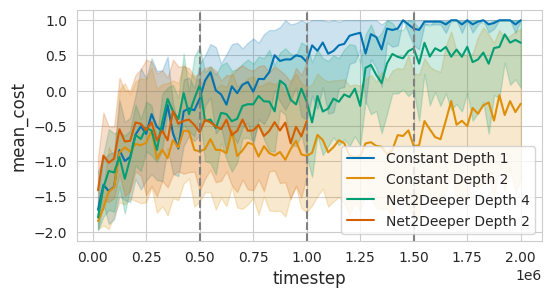

In [20]:
sns.lineplot(data=baseline_depth_1_training_process_data, x="timestep", y="mean_cost", label="Constant Depth 1")
sns.lineplot(data=baseline_depth_2_training_process_data, x="timestep", y="mean_cost", label="Constant Depth 2")
sns.lineplot(data=net2deeper_depth_4_training_process_concat_dataframe, x="timestep", y="mean_cost", label="Net2Deeper Depth 4")
sns.lineplot(data=net2deeper_depth_2_training_process_concat_dataframe, x="timestep", y="mean_cost", label="Net2Deeper Depth 2")
# Add vline every 500000 timesteps
for i in range(1, int(net2deeper_depth_4_training_process_concat_dataframe["timestep"].max()/500000)):
    plt.axvline(x=i*500000, color="gray", linestyle="--")